In [1]:
# Start a simplest RNN to predict stock price
# To be continue
import pandas as pd
import numpy as np
book = pd.read_csv("/Users/kunqi/Downloads/individual_stocks_5yr/AAPL_data.csv")

In [2]:
close_price = book['Close']
print(len(close_price) )
length = len(close_price)
print(close_price[0])

1257
0.002666667


In [3]:
time_steps = 5 # using a truncated size of 5
hidden_units = 10 # hidden unit cells
input_size = 5 # using previous 5 days' percentage change close,open,high,low,volume to predict 6th close
eta = 0.01 # learning rate
n_classes = 1 # output size

In [4]:
batch_size = 5
index = 0
price_graphs = []
while index+batch_size < 1257:
    price_graphs.append((np.array(book[index:index + batch_size]), close_price[index+batch_size]))
    index += 1

train_set = price_graphs[:1000]
test_set = price_graphs[1000:]
test_batch_x = []
test_batch_y = []
for x,y in test_set:
    test_batch_x.append(x)
    test_batch_y.append(y)
test_batch_x = np.array(test_batch_x).reshape((len(test_set), time_steps, input_size))
test_batch_y = np.array(test_batch_y).reshape(len(test_set),1)

In [5]:
# feature frame of one window
print(price_graphs[-5])

(array([[  6.67156000e-05,   6.65646000e-04,  -7.10503400e-03,
         -5.15050200e-03,   1.52917396e-01],
       [ -5.33689100e-03,  -7.31724000e-04,   1.89023200e-03,
          8.87514300e-03,   7.82162026e-01],
       [  6.82763250e-02,   6.34402880e-02,   5.22202010e-02,
          4.72509160e-02,   9.77367242e-01],
       [ -1.40005020e-02,  -1.58998440e-02,  -7.30020500e-03,
         -9.99109100e-03,  -6.12545956e-01],
       [ -6.24005100e-03,   1.20857500e-03,   4.32202300e-03,
          5.27093900e-03,   1.56737833e+02]]), 0.015474135)


In [6]:
def next_batch(ite, batch_size, data_set):
    batch_x = []
    batch_y = []
    current_batch = data_set[ite*batch_size:(ite+1)*batch_size]
    for x,y in current_batch:
        batch_x.append(x)
        batch_y.append(y)
    return np.array(batch_x), np.array(batch_y).reshape(batch_size,1)

iter: 0
LossL 359.906
iter: 10
LossL 39.7968
iter: 20
LossL 16.5004
iter: 30
LossL 0.255177
iter: 40
LossL 0.490474
iter: 50
LossL 0.0032779
iter: 60
LossL 0.00274593
iter: 70
LossL 0.00310892
iter: 80
LossL 0.00590272
iter: 90
LossL 0.00582756
iter: 100
LossL 0.00455229
iter: 110
LossL 0.00432002
iter: 120
LossL 0.00520568
iter: 130
LossL 0.00186246
iter: 140
LossL 0.00270276
iter: 150
LossL 0.00174912
iter: 160
LossL 0.000787793
iter: 170
LossL 0.00056777
iter: 180
LossL 0.000969688
iter: 190
LossL 0.00120589


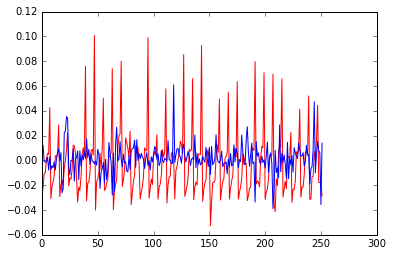

In [7]:
import tensorflow as tf 
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt

output_weights = tf.Variable(tf.random_normal([hidden_units, n_classes]))
output_bias = tf.Variable(tf.random_normal([n_classes]))

x = tf.placeholder("float", [None, time_steps, input_size])
y = tf.placeholder("float", [None,n_classes])

input_t = tf.unstack(x, time_steps, 1)
lstm_layer = rnn.BasicLSTMCell(hidden_units, forget_bias = 1, activation=tf.nn.relu)
outputs, final_state = rnn.static_rnn(lstm_layer, input_t, dtype = "float32")
prediction = tf.matmul(outputs[-1], output_weights) + output_bias

loss = tf.reduce_sum(tf.square(y-prediction)) / 250
opt = tf.train.AdamOptimizer(learning_rate = eta).minimize(loss)


init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    iter = 0
    while iter < 200:
        batch_x, batch_y = next_batch(iter,batch_size,price_graphs)
        batch_x = batch_x.reshape((batch_size, time_steps, input_size))
        sess.run(opt, feed_dict = {x: batch_x, y: batch_y})

        if iter % 10 == 0:
            #acc = sess.run(accuracy, feed_dict = {x: batch_x, y: batch_y})
            los = sess.run(loss, feed_dict = {x:test_batch_x, y:test_batch_y})
            
            print("iter:", iter)
            #print("accuracy:", acc)
            print("LossL", los)
        iter += 1
    
    prediction = sess.run(prediction, feed_dict = {x: test_batch_x})
    axis = np.arange(0,len(prediction),1)
    plt.plot(axis, prediction,'r')
    plt.plot(axis, test_batch_y, 'b')
    plt.show()

